# It is necessary to mount google drive to google colab environment so that both platform can sync together and files will be easier to read.Using the code beblow will easily mount it.

In [97]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab


## **TASK 1.1**

Lets prepare the google colab environment for geospatial analysis. running the comand below will automatically download all package that can be use for geospatial analysis.

In [89]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing the necessary python package that will be use for the assignment are done below;

In [106]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium as fl
import plotly.express as px
import seaborn as sns
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS



# Now lets read the dataset for renewable electricity and skip the first our empty rows then print the first 10 head rows. we have;

In [ ]:
world_Elect= pd.read_csv("API_EG.ELC.RNEW.ZS_DS2_en_csv_v2_4358440.csv",skiprows=4)
world_Elect.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.912186,15.099280,14.856161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.732604,24.966589,25.675879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,78.636408,85.323549,86.050111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,35.163864,34.566146,31.233531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,58.020935,53.175105,53.174928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Albania,ALB,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,AND,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,88.753269,89.432177,86.116700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.770385,3.278073,2.920702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,United Arab Emirates,ARE,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.094142,0.258307,0.232401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Argentina,ARG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.484491,31.576204,28.140069,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# to check for the number of rows and column
world_Elect.shape

(266, 67)

 From the world renewable electricity, we have 266 rows and 67 columns. we can see this using the dot shape command.

# PRE- PROCESSING

In [ ]:
# lets check the number of null/empty dataset available
world_Elect.isnull()

In [ ]:
world_Elect.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2018              265
2019              265
2020              266
2021              266
Unnamed: 66       266
Length: 67, dtype: int64

from the code ran above, we are able to see the number of null set available in the data set and also the data type.There are numerous values missing from the data set.I will only drop the unrelevant column 'unnamed' for now. the data type are all in int64 

In [ ]:
world_Elect.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool

There is data duplication in the dataset

In [ ]:
# Now lets drop the unnamed column which is not relevant in the data set
world_Elect.drop(['Unnamed: 66'],axis=1 , inplace= True)
world_Elect.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.915254,14.912186,15.099280,14.856161,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.795825,22.732604,24.966589,25.675879,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.909980,78.636408,85.323549,86.050111,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.037935,35.163864,34.566146,31.233531,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,60.799484,58.020935,53.175105,53.174928,NaN,NaN,NaN,NaN,NaN,NaN
5,Albania,ALB,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,AND,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.689420,88.753269,89.432177,86.116700,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.481219,3.770385,3.278073,2.920702,NaN,NaN,NaN,NaN,NaN,NaN
8,United Arab Emirates,ARE,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.094142,0.258307,0.232401,NaN,NaN,NaN,NaN,NaN,NaN
9,Argentina,ARG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,29.261135,31.484491,31.576204,28.140069,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
world_Elect.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,265.000000,265.000000,265.000000,265.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.757892,29.703584,29.873031,29.899726,12.071958,12.560554,17.037001,16.246645,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.426717,30.574958,30.498558,29.937615,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,12.071958,12.560554,17.037001,16.246645,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.335945,1.946536,2.755002,2.835942,12.071958,12.560554,17.037001,16.246645,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.323637,20.263184,20.796851,22.387854,12.071958,12.560554,17.037001,16.246645,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.194006,52.304369,52.012855,50.054597,12.071958,12.560554,17.037001,16.246645,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,12.071958,12.560554,17.037001,16.246645,NaN,NaN


From the describtion above,shows that 2015 have the highest mean value of total % of electricity output with a figure of 29.899726 while year 2016 have the lowest with figure of 12.071958.

We can also see the minimum to maximum % output distribution of electricity from 0.000000 to 100.000000. but this tend to increase and decrease simultaneously as the year runs by.

For the 25% and 50% quartile, the distributed figures increases as the year keeps going for all countries.



In [ ]:
# Now we need to read the world naturalearth_lowres dataset to get the geometry and join it with the renewable electricity data set for the plotting of choropleth map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
# Now lets factor out the necessary column which is the country code 'iso_a3' and the geometry, we have;
world_new = world[['iso_a3', 'geometry']]

In [ ]:
# rename the "iso_a3" to Country code and print the first five rows
world_new1 = world_new.rename(columns={'iso_a3': 'Country Code'})
world_new1

,Country Code,geometry
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
#After renaming, now lets merge the two datasets i.e world and world_df together using the Country code which is common to both datasets.
sjoined_world =world_new1.merge(world_Elect,on="Country Code", how='inner')
sjoined_world.head()

,Country Code,geometry,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,66.231159,62.127697,47.166298,45.015885,NaN,NaN,NaN,NaN,NaN,NaN
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,32.188227,29.506817,42.289757,34.154091,NaN,NaN,NaN,NaN,NaN,NaN
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,63.230561,63.298033,62.824992,63.011450,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,12.007397,12.637919,12.953827,13.228593,NaN,NaN,NaN,NaN,NaN,NaN
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,8.231251,7.505384,7.877755,8.874028,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# from sjoined_world dataset, lets identify the Country Name, geometry,2015 and 2000 in a dataframe
sjoined_world1= sjoined_world[["Country Name","geometry","2015","2000"]]
sjoined_world1

,Country Name,geometry,2015,2000
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",45.015885,60.231050
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",34.154091,86.367314
2,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",63.011450,60.600301
3,United States,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",13.228593,8.205997
4,Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",8.874028,14.673447
...,...,...,...,...
162,North Macedonia,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",35.936947,17.178094
163,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",26.905174,35.149385
164,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",49.650350,0.000000
165,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.000000,0.366367


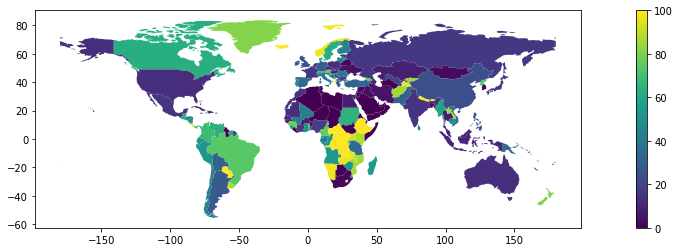

In [ ]:
#plotting the choropleth map considering year 2015, we have; we can see that the yellow color shows the region where the highest % of total electricity output is generated.

sjoined_world1.plot(column='2015', legend=True,figsize=(20, 4))

From the chropleth map,considering year 2015 we can say that the country with the highest % total of electricity output show the yellow color according to the ledgend and this is majorly from middle belt to southern part of africa. Although we have some country like keland,paraguay,Tajikistan and Nepal as it is shown from the map. Country like Ethopia, Central African republic, DR Congo and Namibia dispaly an higher percentage of total electricity output in year 2015.

<AxesSubplot:>

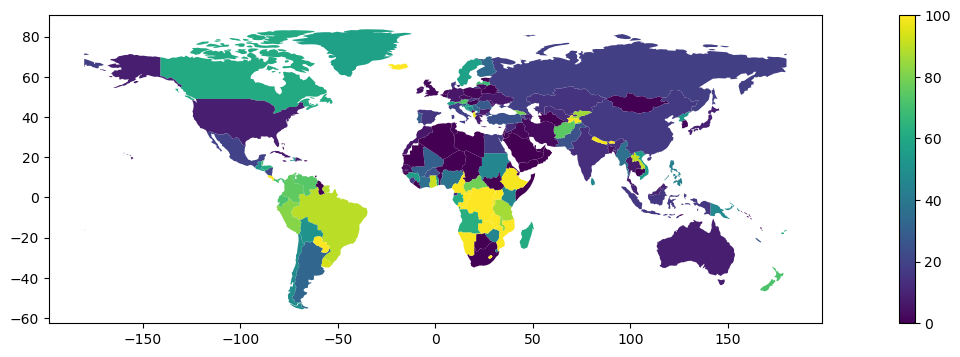

In [ ]:
#plotting the choropleth map considering year 2000, we have; we can see that the yellow color shows the region where the highest %total of electricity output is generated.

sjoined_world1.plot(column='2000', legend=True,figsize=(20, 4),)

Unlike for the 2015, the highest % total electricity output tends to spread to part of the west africa(i.e Ghana,Cameroon).this shows that as at year 2000, the two countries are among the countries having the highest % electricity output in the world.

## **TASK 1.2**

In [ ]:
# Lets load the population dataset and skip the first four empty row, we have;
df_pop = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_4485025.csv",skiprows=4)
df_pop.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0,NaN
5,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,NaN
6,Andorra,AND,"Population, total",SP.POP.TOTL,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,...,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0,77354.0,NaN
7,Arab World,ARB,"Population, total",SP.POP.TOTL,92197715.0,94724540.0,97334438.0,100034191.0,102832792.0,105736428.0,...,379696477.0,387899835.0,396028301.0,404042892.0,411942825.0,419851989.0,427870273.0,436080728.0,444517783.0,NaN
8,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,92417.0,100801.0,112112.0,125130.0,138049.0,149855.0,...,9197908.0,9214182.0,9262896.0,9360975.0,9487206.0,9630966.0,9770526.0,9890400.0,9991083.0,NaN
9,Argentina,ARG,"Population, total",SP.POP.TOTL,20481781.0,20817270.0,21153042.0,21488916.0,21824427.0,22159644.0,...,42202935.0,42669500.0,43131966.0,43590368.0,44044811.0,44494502.0,44938712.0,45376763.0,45808747.0,NaN


In [ ]:
df_pop.shape

(266, 67)

From the world total population dataset, we have 266 rows and 67 columns

In [ ]:
# check for null data set
df_pop.isnull()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
262,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
263,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# to check for the sum of null dataset
df_pop.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2018                2
2019                2
2020                2
2021                2
Unnamed: 66       266
Length: 67, dtype: int64

We can se that number of null data set can be found in the year 2018 to 2021 and its not significant, also the cloumn with 'unnamed'. we need to drop the 'unnamed column as its not useful for the analysis. all datatype are in int64

In [ ]:
# To check if there is duplicate in the dataset
df_pop.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool

In [ ]:
# To drop the 'unnamed' column which is not useful
df_pop.drop(['Unnamed: 66'],axis=1 , inplace= True)
df_pop.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0
5,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0
6,Andorra,AND,"Population, total",SP.POP.TOTL,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,...,82427.0,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0,77354.0
7,Arab World,ARB,"Population, total",SP.POP.TOTL,92197715.0,94724540.0,97334438.0,100034191.0,102832792.0,105736428.0,...,371437642.0,379696477.0,387899835.0,396028301.0,404042892.0,411942825.0,419851989.0,427870273.0,436080728.0,444517783.0
8,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,92417.0,100801.0,112112.0,125130.0,138049.0,149855.0,...,9141598.0,9197908.0,9214182.0,9262896.0,9360975.0,9487206.0,9630966.0,9770526.0,9890400.0,9991083.0
9,Argentina,ARG,"Population, total",SP.POP.TOTL,20481781.0,20817270.0,21153042.0,21488916.0,21824427.0,22159644.0,...,41733271.0,42202935.0,42669500.0,43131966.0,43590368.0,44044811.0,44494502.0,44938712.0,45376763.0,45808747.0


## **TASK 1.2.1**

To generate a choropleth map for population less that 9029575 in year 2005 we have

In [ ]:
#To generate a choropleth map for population less than 9029575 in year 2005 we have
Pop_2005 = df_pop[df_pop["2005"]<9029575]
Pop_2005


NameError: ignored

From the above code ran, column year 2005 was chopped out having population less than 9029575

In [ ]:
# lets show the country code and the chopped out Pop_2005
Countries_names = Pop_2005[["Country Code", "2005"]]
Countries_names.head()

In [ ]:
# now lets merge the two datasets i.e Countries_names and world_Elect together using the Country code which is common to both datasets.
sjoined_pop =Countries_names.merge(world_Elect,on="Country Code", how='inner')
sjoined_pop.head()

In [ ]:
# Also we need to merge sjoined_pop and world_new1 together so that we can get the geometry column
Map_2005 = world_new1.merge(sjoined_pop,on ='Country Code' )
Map_2005

In [ ]:
# Now lets factor out the Conuntry code, geometry and 2005_x column so that we can plot the choropleth map
sjoined_Map2005 = Map_2005[["Country Code","geometry","2005_x" ]]
sjoined_Map2005

In [ ]:
# Plotting the choropleth map for population less than  9029575 in the year 2005 we have
sjoined_Map2005.plot(column = '2005_x', legend=True, figsize=(20,4))

From the map above, this does not really interpret much information but just to show the distribution of lesser population than 9029575 in year 2005 having the yellow color.from the map the yellow color shows that the population is higher but lesser that 9029575 in year 2005 but the purple color has the least population.

In [ ]:
# plotting the bar chat give us the population distribution range of countries in 2005 lesser than 9029575
plt.figure(figsize=(9,25))
ax = sns.barplot(x="2005_x", y="Country Code",
                 data=sjoined_Map2005, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(sjoined_Map2005["2005_x"]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =10)
plt.title("Population of each country in 2005")
ax.set_xlabel(xlabel = 'Population in Billion', fontsize = 10)
ax.set_ylabel(ylabel = 'Countries', fontsize = 10)
plt.show()

## **TASK 1.2.2**

In this Task choropleth map of poulation greater than 295516595 in year 2005 was plotted.Firstly we have to factor out year 2005 in the population dataset having population greater than 295516595.

In [ ]:
Pop1_2005 = df_pop[df_pop["2005"]>295516595]
Pop1_2005

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1.308368e+08,1.341598e+08,1.376146e+08,1.412020e+08,1.449202e+08,1.487700e+08,...,5.474829e+08,5.626016e+08,5.780754e+08,5.938718e+08,6.099789e+08,6.263929e+08,6.430901e+08,6.600463e+08,6.772433e+08,6.946651e+08
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,9.639642e+07,9.840722e+07,1.005070e+08,1.026913e+08,1.049535e+08,1.072899e+08,...,3.702430e+08,3.804379e+08,3.908830e+08,4.015867e+08,4.125513e+08,4.237699e+08,4.352294e+08,4.469116e+08,4.588035e+08,4.708989e+08
7,Arab World,ARB,"Population, total",SP.POP.TOTL,9.219772e+07,9.472454e+07,9.733444e+07,1.000342e+08,1.028328e+08,1.057364e+08,...,3.714376e+08,3.796965e+08,3.878998e+08,3.960283e+08,4.040429e+08,4.119428e+08,4.198520e+08,4.278703e+08,4.360807e+08,4.445178e+08
40,China,CHN,"Population, total",SP.POP.TOTL,6.670700e+08,6.603300e+08,6.657700e+08,6.823350e+08,6.983550e+08,7.151850e+08,...,1.354190e+09,1.363240e+09,1.371860e+09,1.379860e+09,1.387790e+09,1.396215e+09,1.402760e+09,1.407745e+09,1.411100e+09,1.412360e+09
61,East Asia & Pacific (excluding high income),EAP,"Population, total",SP.POP.TOTL,8.948855e+08,8.944895e+08,9.064242e+08,9.296453e+08,9.525050e+08,9.763716e+08,...,1.997903e+09,2.014797e+09,2.031204e+09,2.046848e+09,2.062250e+09,2.077989e+09,2.091698e+09,2.103723e+09,2.114009e+09,2.122086e+09
62,Early-demographic dividend,EAR,"Population, total",SP.POP.TOTL,9.800033e+08,1.003195e+09,1.027205e+09,1.051973e+09,1.077531e+09,1.103860e+09,...,2.994347e+09,3.037084e+09,3.079686e+09,3.122157e+09,3.164440e+09,3.206486e+09,3.248414e+09,3.290291e+09,3.332104e+09,3.373867e+09
63,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.041674e+09,1.043657e+09,1.058120e+09,1.083884e+09,1.109291e+09,1.135760e+09,...,2.240313e+09,2.257904e+09,2.275076e+09,2.291504e+09,2.307707e+09,2.324121e+09,2.338485e+09,2.351128e+09,2.361518e+09,2.368623e+09
64,Europe & Central Asia (excluding high income),ECA,"Population, total",SP.POP.TOTL,2.562403e+08,2.603763e+08,2.645624e+08,2.687668e+08,2.729597e+08,2.770955e+08,...,3.824769e+08,3.850509e+08,3.876219e+08,3.902580e+08,3.928362e+08,3.952575e+08,3.974061e+08,3.993861e+08,4.008960e+08,4.018289e+08
65,Europe & Central Asia,ECS,"Population, total",SP.POP.TOTL,6.667534e+08,6.744507e+08,6.823978e+08,6.904117e+08,6.983556e+08,7.060705e+08,...,8.937558e+08,8.980225e+08,9.023679e+08,9.066698e+08,9.108705e+08,9.146083e+08,9.180311e+08,9.208076e+08,9.229760e+08,9.237537e+08
68,Euro area,EMU,"Population, total",SP.POP.TOTL,2.652040e+08,2.676211e+08,2.701101e+08,2.726554e+08,2.751634e+08,2.776510e+08,...,3.361592e+08,3.373021e+08,3.384622e+08,3.394884e+08,3.404818e+08,3.412172e+08,3.419792e+08,3.422834e+08,3.427084e+08,3.425665e+08


In [ ]:
# factor out the country code and the population in 2005 stated above
Countries_names1 = Pop1_2005[["Country Code", "2005"]]
Countries_names1.head()

,Country Code,2005
1,AFE,4.534041e+08
3,AFW,3.055206e+08
7,ARB,3.149658e+08
40,CHN,1.303720e+09
61,EAP,1.895295e+09


In [ ]:
#now lets merge the two datasets i.e Countries_names1 and world_Elect together using the Country code which is common to both datasets.
sjoined1_pop =Countries_names1.merge(world_Elect,on="Country Code", how='inner')
sjoined1_pop.head()

,Country Code,2005_x,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFE,4.534041e+08,Africa Eastern and Southern,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,21.795825,22.732604,24.966589,25.675879,NaN,NaN,NaN,NaN,NaN,NaN
1,AFW,3.055206e+08,Africa Western and Central,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,36.037935,35.163864,34.566146,31.233531,NaN,NaN,NaN,NaN,NaN,NaN
2,ARB,3.149658e+08,Arab World,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,3.481219,3.770385,3.278073,2.920702,NaN,NaN,NaN,NaN,NaN,NaN
3,CHN,1.303720e+09,China,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,19.966249,20.296227,22.609154,23.926817,NaN,NaN,NaN,NaN,NaN,NaN
4,EAP,1.895295e+09,East Asia & Pacific (excluding high income),Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,19.974573,20.263184,22.309298,23.394685,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Also we need to merge sjoined1_pop and world_new1 together to get the geometry
Map1_2005 = world_new1.merge(sjoined1_pop,on ='Country Code' )
Map1_2005

,Country Code,geometry,2005_x,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2.955166e+08,United States,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,...,12.007397,12.637919,12.953827,13.228593,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",1.147610e+09,India,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,...,15.732973,17.349314,16.253840,15.343050,NaN,NaN,NaN,NaN,NaN,NaN
2,CHN,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.303720e+09,China,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,...,19.966249,20.296227,22.609154,23.926817,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Now lets factor out the country code, geometry and 2005_x. we have;
sjoined1_Map2005 = Map1_2005[["Country Code","geometry","2005_x" ]]
sjoined1_Map2005

,Country Code,geometry,2005_x
0,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2.955166e+08
1,IND,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",1.147610e+09
2,CHN,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.303720e+09


From the table above, only three country which are USA, INDIAN AND CHINA appear to have the highest population.

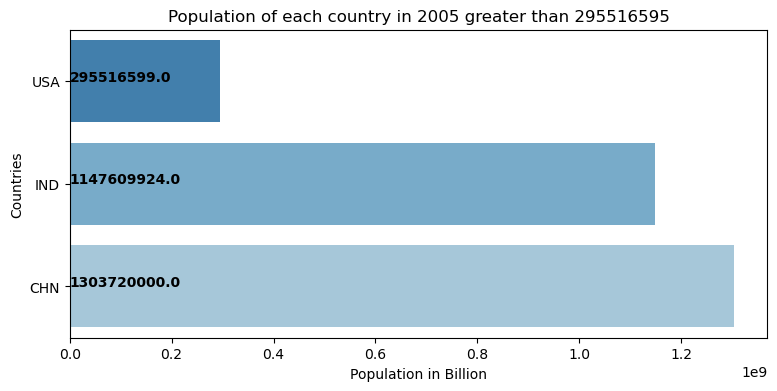

In [ ]:
# To know the highest population among the three countries.
plt.figure(figsize=(9,4))
ax = sns.barplot(x="2005_x", y="Country Code",
                 data=sjoined1_Map2005, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(sjoined1_Map2005["2005_x"]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =10)
plt.title("Population of each country in 2005 greater than 295516595")
ax.set_xlabel(xlabel = 'Population in Billion', fontsize = 10)
ax.set_ylabel(ylabel = 'Countries', fontsize = 10)
plt.show()

We can see that china has the highest population distribution among the three countries followed by china.

<AxesSubplot:>

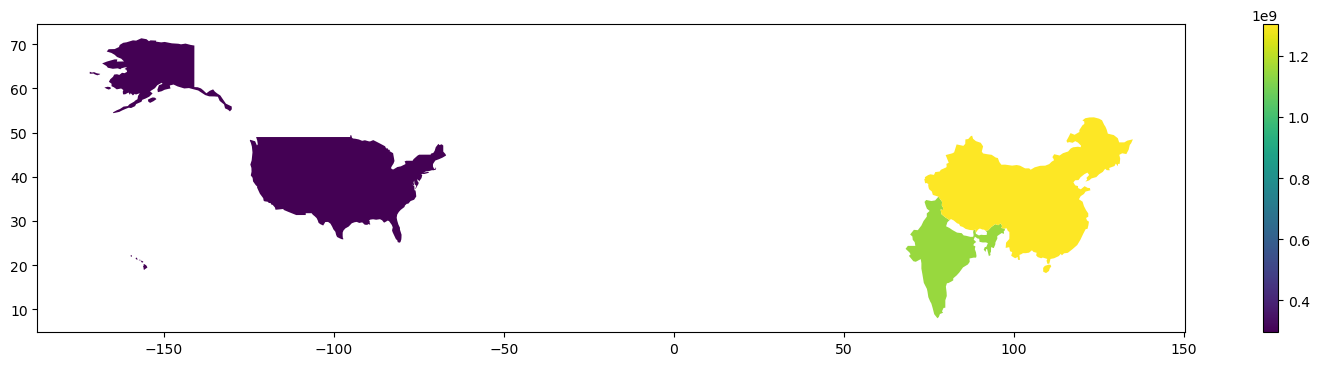

In [ ]:
# plotting choropleth map of th
sjoined1_Map2005.plot(column = '2005_x', legend=True, figsize=(20,4))

From the map, this shown that china having the yellow color have the highest population distribution in year 2005

## **Task 1.2.3**

To plot the choropleth map of population between 138865014 and 1147609925 in the year 2005.


In [ ]:
# To plot the choropleth map of population between 138865014 and 1147609925 in the year 2005. 
Pop2_2005 = df_pop[df_pop["2005"].between(138865014,1147609925)]
Pop2_2005

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,5.474829e+08,5.626016e+08,5.780754e+08,5.938718e+08,6.099789e+08,6.263929e+08,6.430901e+08,6.600463e+08,6.772433e+08,6.946651e+08
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,3.702430e+08,3.804379e+08,3.908830e+08,4.015867e+08,4.125513e+08,4.237699e+08,4.352294e+08,4.469116e+08,4.588035e+08,4.708989e+08
7,Arab World,ARB,"Population, total",SP.POP.TOTL,92197715.0,94724540.0,97334438.0,100034191.0,102832792.0,105736428.0,...,3.714376e+08,3.796965e+08,3.878998e+08,3.960283e+08,4.040429e+08,4.119428e+08,4.198520e+08,4.278703e+08,4.360807e+08,4.445178e+08
20,Bangladesh,BGD,"Population, total",SP.POP.TOTL,48013505.0,49362834.0,50752150.0,52202008.0,53741721.0,55385114.0,...,1.510057e+08,1.527614e+08,1.545174e+08,1.562563e+08,1.579772e+08,1.596854e+08,1.613767e+08,1.630462e+08,1.646894e+08,1.663035e+08
29,Brazil,BRA,"Population, total",SP.POP.TOTL,72179235.0,74311338.0,76514329.0,78772647.0,81064572.0,83373533.0,...,1.992873e+08,2.010359e+08,2.027637e+08,2.044718e+08,2.061631e+08,2.078338e+08,2.094693e+08,2.110495e+08,2.125594e+08,2.139934e+08
64,Europe & Central Asia (excluding high income),ECA,"Population, total",SP.POP.TOTL,256240323.0,260376316.0,264562393.0,268766831.0,272959744.0,277095486.0,...,3.824769e+08,3.850509e+08,3.876219e+08,3.902580e+08,3.928362e+08,3.952575e+08,3.974061e+08,3.993861e+08,4.008960e+08,4.018289e+08
65,Europe & Central Asia,ECS,"Population, total",SP.POP.TOTL,666753356.0,674450666.0,682397828.0,690411692.0,698355574.0,706070460.0,...,8.937558e+08,8.980225e+08,9.023679e+08,9.066698e+08,9.108705e+08,9.146083e+08,9.180311e+08,9.208076e+08,9.229760e+08,9.237537e+08
68,Euro area,EMU,"Population, total",SP.POP.TOTL,265203956.0,267621091.0,270110063.0,272655396.0,275163380.0,277650954.0,...,3.361592e+08,3.373021e+08,3.384622e+08,3.394884e+08,3.404818e+08,3.412172e+08,3.419792e+08,3.422834e+08,3.427084e+08,3.425665e+08
73,European Union,EUU,"Population, total",SP.POP.TOTL,356906098.0,359998408.0,363200480.0,366516509.0,369850237.0,373032729.0,...,4.413959e+08,4.424695e+08,4.435767e+08,4.445438e+08,4.454877e+08,4.461863e+08,4.469151e+08,4.471978e+08,4.474795e+08,4.469467e+08
74,Fragile and conflict affected situations,FCS,"Population, total",SP.POP.TOTL,245134016.0,250274396.0,255615131.0,261136143.0,266820455.0,272657455.0,...,8.060495e+08,8.250107e+08,8.439651e+08,8.630042e+08,8.819380e+08,9.008724e+08,9.201035e+08,9.400260e+08,9.609606e+08,9.829808e+08


In [ ]:
# Factor out country code and the population in 2005 we have five country on the list
Countries_names2 = Pop2_2005[["Country Code", "2005"]]
Countries_names2.head()

,Country Code,2005
1,AFE,453404076.0
3,AFW,305520588.0
7,ARB,314965776.0
20,BGD,139035505.0
29,BRA,186127108.0


In [ ]:
# now lets merge the two datasets i.e sjoined2_pop and world_Elect together using the Country code which is common to both datasets.
sjoined2_pop =Countries_names2.merge(world_Elect,on="Country Code", how='inner')
sjoined2_pop.head()

,Country Code,2005_x,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFE,453404076.0,Africa Eastern and Southern,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,21.795825,22.732604,24.966589,25.675879,NaN,NaN,NaN,NaN,NaN,NaN
1,AFW,305520588.0,Africa Western and Central,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,36.037935,35.163864,34.566146,31.233531,NaN,NaN,NaN,NaN,NaN,NaN
2,ARB,314965776.0,Arab World,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,3.481219,3.770385,3.278073,2.920702,NaN,NaN,NaN,NaN,NaN,NaN
3,BGD,139035505.0,Bangladesh,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,1.600016,1.946536,1.319724,1.226890,NaN,NaN,NaN,NaN,NaN,NaN
4,BRA,186127108.0,Brazil,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,...,82.448283,76.689208,73.082074,73.966908,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Merging sjoined2_pop and world_new1 together 
Map2_2005 = world_new1.merge(sjoined2_pop,on ='Country Code' )
Map2_2005

,Country Code,geometry,2005_x,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,USA,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0...",2.955166e+08,United States,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,...,12.007397,12.637919,12.953827,13.228593,NaN,NaN,NaN,NaN,NaN,NaN
1,IDN,"MULTIPOLYGON (((141.000 -2.600, 141.017 -5.859...",2.262895e+08,Indonesia,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,...,11.236814,12.270160,11.475100,10.651156,12.071958,12.560554,17.037001,16.246645,NaN,NaN
2,RUS,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",1.435188e+08,Russian Federation,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,...,15.563731,17.174630,16.568251,15.855795,NaN,NaN,NaN,NaN,NaN,NaN
3,BRA,"POLYGON ((-53.374 -33.768, -53.651 -33.202, -5...",1.861271e+08,Brazil,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,...,82.448283,76.689208,73.082074,73.966908,NaN,NaN,NaN,NaN,NaN,NaN
4,NGA,"POLYGON ((2.692 6.259, 2.749 7.871, 2.724 8.50...",1.388650e+08,Nigeria,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,...,19.713649,18.439913,17.591313,18.195125,NaN,NaN,NaN,NaN,NaN,NaN
5,IND,"POLYGON ((97.327 28.262, 97.403 27.883, 97.052...",1.147610e+09,India,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,...,15.732973,17.349314,16.253840,15.343050,NaN,NaN,NaN,NaN,NaN,NaN
6,BGD,"POLYGON ((92.673 22.041, 92.652 21.324, 92.303...",1.390355e+08,Bangladesh,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,...,1.600016,1.946536,1.319724,1.226890,NaN,NaN,NaN,NaN,NaN,NaN
7,PAK,"POLYGON ((77.837 35.494, 76.872 34.654, 75.757...",1.603040e+08,Pakistan,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,...,31.060598,31.006188,31.102554,31.430350,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Fctor out the country code ,geometry and 2005_x
sjoined2_Map2005 = Map2_2005[["Country Code","geometry","2005_x" ]]
sjoined2_Map2005

,Country Code,geometry,2005_x
0,USA,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0...",2.955166e+08
1,IDN,"MULTIPOLYGON (((141.000 -2.600, 141.017 -5.859...",2.262895e+08
2,RUS,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",1.435188e+08
3,BRA,"POLYGON ((-53.374 -33.768, -53.651 -33.202, -5...",1.861271e+08
4,NGA,"POLYGON ((2.692 6.259, 2.749 7.871, 2.724 8.50...",1.388650e+08
5,IND,"POLYGON ((97.327 28.262, 97.403 27.883, 97.052...",1.147610e+09
6,BGD,"POLYGON ((92.673 22.041, 92.652 21.324, 92.303...",1.390355e+08
7,PAK,"POLYGON ((77.837 35.494, 76.872 34.654, 75.757...",1.603040e+08


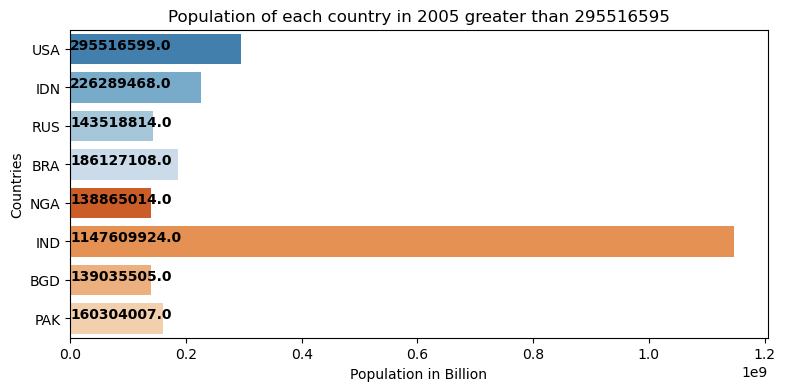

In [ ]:
plt.figure(figsize=(9,4))
ax = sns.barplot(x="2005_x", y="Country Code",
                 data=sjoined2_Map2005, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(sjoined2_Map2005["2005_x"]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =10)
plt.title("Population of each country in 2005 greater than 295516595")
ax.set_xlabel(xlabel = 'Population in Billion', fontsize = 10)
ax.set_ylabel(ylabel = 'Countries', fontsize = 10)
plt.show()

Indian shows the highest distribution here from the bar chat above

<AxesSubplot:>

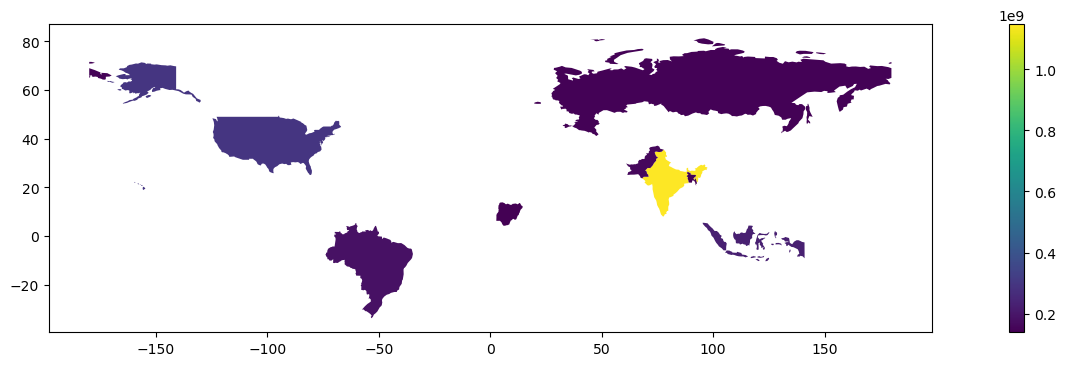

In [ ]:
# plotting the choropleth map we have;
sjoined2_Map2005.plot(column = '2005_x', legend=True, figsize=(20,4))

This show that indian has the highest distribution with a yello color from the legend.

## **Task 1.2.4**

To find and plot the percentage change in renewable electricity output from 2000 to 2010, for the country having the highest population in 2010 we must first find the country with the highest population in 2010. To do that we have;

In [ ]:
# lets sort the population by highest value for year 2010, in the population data
POP = df_pop.sort_values(by="2010", axis=0, ascending= False)
POP.head(20)

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,POP_Mean
259,World,6.114324e+09,6.193664e+09,6.272724e+09,6.351856e+09,6.431527e+09,6.511725e+09,6.592712e+09,6.674182e+09,6.757000e+09,6.839554e+09,6.921855e+09,6.473927e+09
103,IDA & IBRD total,5.065356e+09,5.137394e+09,5.209071e+09,5.280906e+09,5.352906e+09,5.425273e+09,5.497768e+09,5.570326e+09,5.643684e+09,5.717806e+09,5.792386e+09,5.390049e+09
140,Low & middle income,4.989858e+09,5.062006e+09,5.133727e+09,5.205374e+09,5.277136e+09,5.349239e+09,5.421455e+09,5.493906e+09,5.567161e+09,5.640983e+09,5.715349e+09,5.314084e+09
156,Middle income,4.592354e+09,4.653117e+09,4.713003e+09,4.772393e+09,4.831530e+09,4.890688e+09,4.949622e+09,5.008455e+09,5.067845e+09,5.127663e+09,5.187959e+09,4.860667e+09
102,IBRD only,3.987187e+09,4.032815e+09,4.077635e+09,4.122140e+09,4.166298e+09,4.210302e+09,4.253850e+09,4.296852e+09,4.340107e+09,4.383683e+09,4.427039e+09,4.187087e+09
62,Early-demographic dividend,2.472853e+09,2.516662e+09,2.560101e+09,2.603301e+09,2.646484e+09,2.689792e+09,2.733279e+09,2.776923e+09,2.820637e+09,2.864299e+09,2.907917e+09,2.668433e+09
139,Lower middle income,2.438276e+09,2.480945e+09,2.523628e+09,2.566375e+09,2.609200e+09,2.652118e+09,2.695157e+09,2.738371e+09,2.781815e+09,2.825556e+09,2.869900e+09,2.631144e+09
249,Upper middle income,2.154078e+09,2.172173e+09,2.189375e+09,2.206018e+09,2.222330e+09,2.238570e+09,2.254465e+09,2.270084e+09,2.286029e+09,2.302107e+09,2.318059e+09,2.229523e+09
63,East Asia & Pacific,2.047640e+09,2.065912e+09,2.083186e+09,2.099602e+09,2.115459e+09,2.131147e+09,2.146744e+09,2.161786e+09,2.177119e+09,2.192059e+09,2.206885e+09,2.122065e+09
142,Late-demographic dividend,2.045117e+09,2.059866e+09,2.073729e+09,2.087284e+09,2.100722e+09,2.114284e+09,2.127728e+09,2.140885e+09,2.154328e+09,2.167824e+09,2.180813e+09,2.107177e+09


In [ ]:
# factoring out the highest population which is china for all the years in the dataset we have;
HIGHEST_POP = POP.loc[POP["Country Name"] =="China"]
HIGHEST_POP

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,POP_Mean
40,China,1.262645e+09,1.271850e+09,1.280400e+09,1.288400e+09,1.296075e+09,1.303720e+09,1.311020e+09,1.317885e+09,1.324655e+09,1.331260e+09,1.337705e+09,1.298791e+09


In [ ]:
# factor out china  been the highest population from the world electricity dataset, we have;
China_C02=world_Elect.loc[world_Elect["Country Name"] =="China"]
China_C02     

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,worldElect_Mean
40,China,16.639498,18.958519,17.618628,15.03704,16.223266,16.175025,15.592783,15.263347,17.737444,17.863798,18.622826,16.710935


In [ ]:
# facrote out the year 2000 to 2010 in the chna popolation

C02_MAX =China_C02.loc[:,'2000':'2010']
C02_MAX

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
40,16.639498,18.958519,17.618628,15.03704,16.223266,16.175025,15.592783,15.263347,17.737444,17.863798,18.622826


In [ ]:
# calculating the percentage chage in the C02_MAX data, we have;

C02_MAX1=C02_MAX.pct_change(axis ="columns")
C02_MAX1

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
40,NaN,0.139368,-0.070675,-0.146526,0.078887,-0.002974,-0.035996,-0.021127,0.162094,0.007124,0.04249


In [ ]:
# Cleaning the number of nan in the dataset

C0S_MaxClean = C02_MAX1.drop('2000', axis=1)
C0S_MaxClean

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
40,0.139368,-0.070675,-0.146526,0.078887,-0.002974,-0.035996,-0.021127,0.162094,0.007124,0.04249


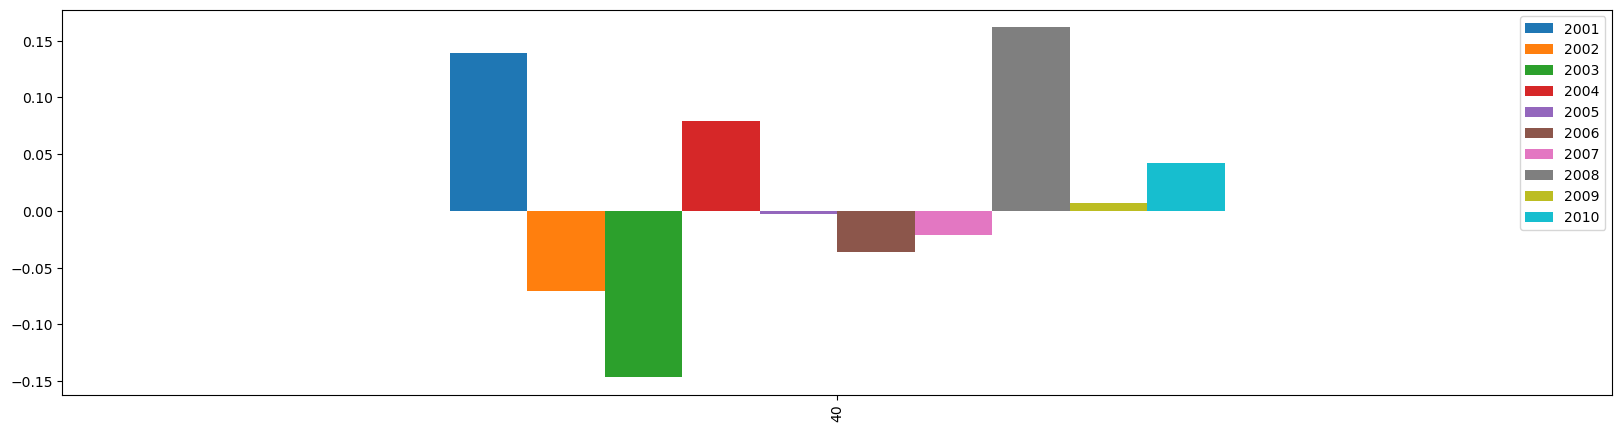

In [ ]:
# Now top plot a barchar and see the graph of the percentate distribution shown.
C0S_MaxClean.plot(kind = 'bar', figsize=(20,5))

plt.show()

In [ ]:
fig = px.line(x=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010], y=[0.139368,-0.070675,-0.146526,0.078887,-0.002974,-0.035996,-0.021127,0.162094,0.007124,0.04249])
fig.update_traces(textposition="bottom right")
fig.show()

## **TASK 1.2.5**

In [ ]:
df_pop.drop(df_pop.columns.difference(['Country Name','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']), axis=1, inplace=True)
df_pop

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,90866.0,92892.0,94992.0,97016.0,98744.0,100028.0,100830.0,101226.0,101362.0,101452.0,101665.0
1,Africa Eastern and Southern,398113044.0,408522129.0,419223717.0,430246635.0,441630149.0,453404076.0,465581372.0,478166911.0,491173160.0,504604672.0,518468229.0
2,Afghanistan,20779957.0,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0
3,Africa Western and Central,267214544.0,274433894.0,281842480.0,289469530.0,297353098.0,305520588.0,313985474.0,322741656.0,331772330.0,341050537.0,350556886.0
4,Angola,16395477.0,16945753.0,17519418.0,18121477.0,18758138.0,19433604.0,20149905.0,20905360.0,21695636.0,22514275.0,23356247.0
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0
262,"Yemen, Rep.",17409071.0,17918369.0,18443684.0,18985001.0,19540096.0,20107416.0,20687648.0,21282514.0,21892149.0,22516464.0,23154854.0
263,South Africa,44967713.0,45571272.0,46150913.0,46719203.0,47291610.0,47880595.0,48489464.0,49119766.0,49779472.0,50477013.0,51216967.0
264,Zambia,10415942.0,10692197.0,10971704.0,11256740.0,11550641.0,11856244.0,12173518.0,12502958.0,12848531.0,13215142.0,13605986.0


In [ ]:
world_Elect.drop(world_Elect.columns.difference(['Country Name','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']), axis=1, inplace=True)
world_Elect

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.327377
1,Africa Eastern and Southern,15.983738,17.584168,18.035637,16.930335,16.944777,17.691273,18.472924,18.173469,18.288642,19.755338,21.162999
2,Afghanistan,74.989094,72.811460,79.063971,70.249729,70.890841,74.061810,70.755750,72.000000,68.654822,87.176603,85.986547
3,Africa Western and Central,52.858873,51.323559,46.263090,45.451884,45.648428,44.093335,40.843210,36.936289,41.727171,41.550212,38.547084
4,Angola,63.114187,62.087912,64.759207,62.205514,78.405018,79.648241,80.611010,77.618900,75.409047,65.343189,67.957423
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,1.758539,1.390374,1.399731,1.432507,2.768251,2.512337,2.277853,1.944157,1.472298,2.411576,3.037926
262,"Yemen, Rep.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
263,South Africa,0.677454,1.101007,1.208799,0.417733,0.508031,0.665138,1.267685,0.442994,0.587823,0.693637,0.948381
264,Zambia,99.384458,99.370515,99.374463,99.374173,99.435825,99.406893,99.865730,99.875557,99.874135,99.878702,99.875574


In [ ]:
df_pop['POP_Mean']= df_pop.iloc[:,1:11].mean(axis=1)
df_pop

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,POP_Mean
0,Aruba,90866.0,92892.0,94992.0,97016.0,98744.0,100028.0,100830.0,101226.0,101362.0,101452.0,101665.0,97940.8
1,Africa Eastern and Southern,398113044.0,408522129.0,419223717.0,430246635.0,441630149.0,453404076.0,465581372.0,478166911.0,491173160.0,504604672.0,518468229.0,449066586.5
2,Afghanistan,20779957.0,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,24870024.4
3,Africa Western and Central,267214544.0,274433894.0,281842480.0,289469530.0,297353098.0,305520588.0,313985474.0,322741656.0,331772330.0,341050537.0,350556886.0,302538413.1
4,Angola,16395477.0,16945753.0,17519418.0,18121477.0,18758138.0,19433604.0,20149905.0,20905360.0,21695636.0,22514275.0,23356247.0,19243904.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1717912.9
262,"Yemen, Rep.",17409071.0,17918369.0,18443684.0,18985001.0,19540096.0,20107416.0,20687648.0,21282514.0,21892149.0,22516464.0,23154854.0,19878241.2
263,South Africa,44967713.0,45571272.0,46150913.0,46719203.0,47291610.0,47880595.0,48489464.0,49119766.0,49779472.0,50477013.0,51216967.0,47644702.1
264,Zambia,10415942.0,10692197.0,10971704.0,11256740.0,11550641.0,11856244.0,12173518.0,12502958.0,12848531.0,13215142.0,13605986.0,11748361.7


In [ ]:
world_Elect['worldElect_Mean']= world_Elect.iloc[:,1:11].mean(axis=1)
world_Elect

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,worldElect_Mean
0,Aruba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.327377,0.000000
1,Africa Eastern and Southern,15.983738,17.584168,18.035637,16.930335,16.944777,17.691273,18.472924,18.173469,18.288642,19.755338,21.162999,17.786030
2,Afghanistan,74.989094,72.811460,79.063971,70.249729,70.890841,74.061810,70.755750,72.000000,68.654822,87.176603,85.986547,74.065408
3,Africa Western and Central,52.858873,51.323559,46.263090,45.451884,45.648428,44.093335,40.843210,36.936289,41.727171,41.550212,38.547084,44.669605
4,Angola,63.114187,62.087912,64.759207,62.205514,78.405018,79.648241,80.611010,77.618900,75.409047,65.343189,67.957423,70.920222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,1.758539,1.390374,1.399731,1.432507,2.768251,2.512337,2.277853,1.944157,1.472298,2.411576,3.037926,1.936762
262,"Yemen, Rep.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
263,South Africa,0.677454,1.101007,1.208799,0.417733,0.508031,0.665138,1.267685,0.442994,0.587823,0.693637,0.948381,0.757030
264,Zambia,99.384458,99.370515,99.374463,99.374173,99.435825,99.406893,99.865730,99.875557,99.874135,99.878702,99.875574,99.584045


In [ ]:
df_Mean = df_pop[["Country Name", "POP_Mean"]]
df_Mean

,Country Name,POP_Mean
0,Aruba,97940.8
1,Africa Eastern and Southern,449066586.5
2,Afghanistan,24870024.4
3,Africa Western and Central,302538413.1
4,Angola,19243904.3
...,...,...
261,Kosovo,1717912.9
262,"Yemen, Rep.",19878241.2
263,South Africa,47644702.1
264,Zambia,11748361.7


In [ ]:
df_Elect = world_Elect[["Country Name", "worldElect_Mean"]]
df_Elect

,Country Name,worldElect_Mean
0,Aruba,0.000000
1,Africa Eastern and Southern,17.786030
2,Afghanistan,74.065408
3,Africa Western and Central,44.669605
4,Angola,70.920222
...,...,...
261,Kosovo,1.936762
262,"Yemen, Rep.",0.000000
263,South Africa,0.757030
264,Zambia,99.584045


In [ ]:
Merge_Mean = df_Mean.merge(df_Elect,on = "Country Name", how = "outer")
Merge_Mean

,Country Name,POP_Mean,worldElect_Mean
0,Aruba,97940.8,0.000000
1,Africa Eastern and Southern,449066586.5,17.786030
2,Afghanistan,24870024.4,74.065408
3,Africa Western and Central,302538413.1,44.669605
4,Angola,19243904.3,70.920222
...,...,...,...
261,Kosovo,1717912.9,1.936762
262,"Yemen, Rep.",19878241.2,0.000000
263,South Africa,47644702.1,0.757030
264,Zambia,11748361.7,99.584045


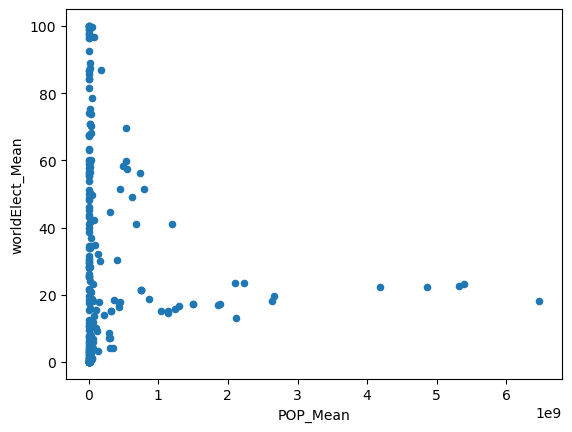

In [ ]:
# plot using the plot() function in pandas
Merge_Mean.plot(kind="scatter",x="POP_Mean",y="worldElect_Mean")
plt.show()

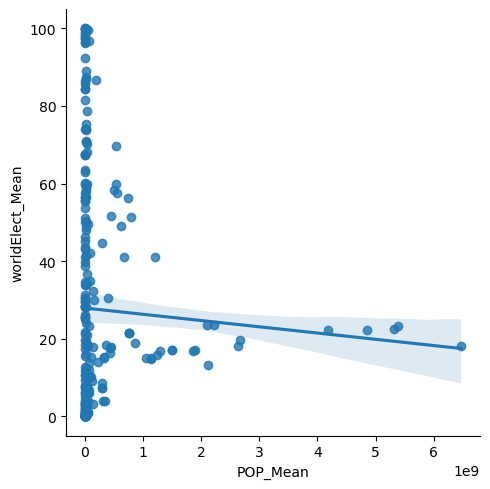

In [ ]:
# scatter plot using seaborn
sns.lmplot(x="POP_Mean",y="worldElect_Mean",data=Merge_Mean,fit_reg=True)
plt.show()

# **PART 2 – Geospatial Sentiment Analysis using Social Media Data**

In this part, a tweet csv file will be used in which 500 tweet will be pick at a random for sentimental analysis. To start with, lets load the tweet dataset.

In [ ]:
# to load the tweet dataset from the csv file we have
df = pd.read_csv("Task 2 Tweet Data.csv")
df.head(10)

,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,coordinates,place
0,https://twitter.com/thomascheneygpc/status/146...,1461120800350621700,2021-11-17T23:55:19+00:00,@sjmuir Why I like local Renewable Natural Gas...,NaN,False,0,0,0,0,en,Twitter for iPhone,NaN,NaN
1,https://twitter.com/alexizawadzki/status/14611...,1461118744613187585,2021-11-17T23:47:09+00:00,Nevada is critical towards the clean energy tr...,Greater Vancouver,False,0,1,21,0,en,Twitter for iPhone,NaN,NaN
2,https://twitter.com/getiftech/status/146111665...,1461116656986599433,2021-11-17T23:38:51+00:00,COP26 Net Zero Commitments will Speed Energy T...,NaN,False,0,0,0,0,en,TekieBoard,NaN,NaN
3,https://twitter.com/KirkMMorrison/status/14611...,1461114703636140042,2021-11-17T23:31:06+00:00,@alanfryermedia You’re onto something! 🇨🇦 has ...,"Calgary, Alberta",False,0,1,5,0,en,Twitter for iPhone,NaN,NaN
4,https://twitter.com/ColumbiaUEnergy/status/146...,1461114427466346499,2021-11-17T23:30:00+00:00,"""The reality is that actions in this decade wi...","New York, New York",True,0,1,3,1,en,Twitter for Advertisers.,NaN,NaN
5,https://twitter.com/MonashEnergy/status/146111...,1461113313073397760,2021-11-17T23:25:34+00:00,#SoERC2021 plenary speaker @ProfMarkHowden wil...,"Melbourne, Victoria",False,0,4,3,0,en,Twitter Web App,NaN,NaN
6,https://twitter.com/twodtwod/status/1461113142...,1461113142474379272,2021-11-17T23:24:53+00:00,"In Kyiv, I moderated an EU-Ukraine respectful ...","NYC, Berlin, Caracas",False,0,0,0,0,en,Twitter Web App,NaN,NaN
7,https://twitter.com/SJENERGY/status/1461112337...,1461112337285455872,2021-11-17T23:21:42+00:00,#NetZeroCarbon #EnergyTransition #PoweringOurF...,"Saint John, New Brunswick",False,0,1,4,0,und,Twitter Web App,NaN,NaN
8,https://twitter.com/c2_technology/status/14611...,1461110140996919301,2021-11-17T23:12:58+00:00,In collaboration with ABP (Lurgan) we've start...,"London, England",False,0,0,0,0,en,Twitter Web App,NaN,NaN
9,https://twitter.com/casartel/status/1461108679...,1461108679122591746,2021-11-17T23:07:09+00:00,Congratulations to #EDP! It's a rewarding feel...,"45.81726,8.819611",False,0,0,0,0,en,Powered by Sprinklr,NaN,NaN


In [ ]:
df.shape

(16726, 14)

In [ ]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        tweetURL  tweetID   date  tweetContent  userLocation  isUserVerified  \
0         False    False  False         False          True           False   
1         False    False  False         False         False           False   
2         False    False  False         False          True           False   
3         False    False  False         False         False           False   
4         False    False  False         False         False           False   
...         ...      ...    ...           ...           ...             ...   
16721     False    False  False         False         False           False   
16722     False    False  False         False         False           False   
16723     False    False  False         False         False           False   
16724     False    False  False         False         False           False   
16725     False    False  False         False         False          

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16726 entries, 0 to 16725
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweetURL        16726 non-null  object 
 1   tweetID         16726 non-null  int64  
 2   date            16726 non-null  object 
 3   tweetContent    16726 non-null  object 
 4   userLocation    13295 non-null  object 
 5   isUserVerified  16726 non-null  bool   
 6   replyCount      16726 non-null  int64  
 7   retweetCount    16726 non-null  int64  
 8   likeCount       16726 non-null  int64  
 9   quoteCount      16726 non-null  int64  
 10  tweetLanguage   16726 non-null  object 
 11  sourceLabel     16726 non-null  object 
 12  coordinates     0 non-null      float64
 13  place           0 non-null      float64
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 1.7+ MB


In [ ]:
# We need to factor out the column we want to analyze which is the 'tweetContent' and 'userLocation'
df1 = df[['tweetContent', 'userLocation']]

In [ ]:
df1

,tweetContent,userLocation
0,@sjmuir Why I like local Renewable Natural Gas...,NaN
1,Nevada is critical towards the clean energy tr...,Greater Vancouver
2,COP26 Net Zero Commitments will Speed Energy T...,NaN
3,@alanfryermedia You’re onto something! 🇨🇦 has ...,"Calgary, Alberta"
4,"""The reality is that actions in this decade wi...","New York, New York"
...,...,...
16721,'Four jobs in renewables for each lost in ener...,DCA | HOU | DEN
16722,Looking forward to speaking tomorrow at Northe...,Australia
16723,Success is walking from failure to failure wit...,"Islamabad, Pakistan"
16724,!a rapid clean-energy transition is the least ...,San Francisco


# **Task 2.1: Data Pre-processing**

Here there is need to clean the tweet to remove the hash-tag, @, / ? etc so that the tweet content can be readable.

In [ ]:
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = " ".join(word for word in temp)
    return temp

In [114]:
df1

,tweetContent,userLocation
1,nevada is critical towards the clean energy tr...,Greater Vancouver
3,youre onto something has a low carbon energy m...,"Calgary, Alberta"
4,the reality is that actions in this decade wil...,"New York, New York"
5,plenary speaker will talk on 0712 about the sc...,"Melbourne, Victoria"
6,in kyiv i moderated an euukraine respectful bu...,"NYC, Berlin, Caracas"
...,...,...
16721,four jobs in renewables for each lost in energ...,DCA | HOU | DEN
16722,looking forward to speaking tomorrow at northe...,Australia
16723,success is walking from failure to failure wit...,"Islamabad, Pakistan"
16724,a rapid cleanenergy transition is the least ex...,San Francisco


In [115]:
df1['tweetContent'] = df1['tweetContent'] \
    .str.replace(r'(?:@|#|https?:|www\.)\S+', '') \
    .str.replace(r'[^A-Za-z0-9 ]+', '') \
    .str.split() \
    .str.join(' ') \
    .str.lower()

<ipython-input-115-3e822c988c08>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['tweetContent'] = df1['tweetContent'] \
<ipython-input-115-3e822c988c08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tweetContent'] = df1['tweetContent'] \


In [116]:
df1

,tweetContent,userLocation
1,nevada is critical towards the clean energy tr...,Greater Vancouver
3,youre onto something has a low carbon energy m...,"Calgary, Alberta"
4,the reality is that actions in this decade wil...,"New York, New York"
5,plenary speaker will talk on 0712 about the sc...,"Melbourne, Victoria"
6,in kyiv i moderated an euukraine respectful bu...,"NYC, Berlin, Caracas"
...,...,...
16721,four jobs in renewables for each lost in energ...,DCA | HOU | DEN
16722,looking forward to speaking tomorrow at northe...,Australia
16723,success is walking from failure to failure wit...,"Islamabad, Pakistan"
16724,a rapid cleanenergy transition is the least ex...,San Francisco


In [117]:
# To drop the null values in the data set we have;
df1.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [122]:
# We have to pick 500 sample tweet at a random for the analysis. practically to get a good perfomance result 500 tweet data set is not enough but we have to use this for practice 
COP= df1.sample(n=500, random_state=0)
COP

,tweetContent,userLocation
1883,looks fantastic,Ontario
7788,by committing to a target engie has accelerate...,"Hauts-de-Seine, Ile-de-France"
9082,take land grabs our data shows palm oil and co...,"New York, NY"
486,nowt like a sweeping generalisation never vote...,"Laurencekirk, Scotland"
190,thanks very much to for the opportunity to sha...,Mexico D.F.
...,...,...
3224,please join the on tuesday as we welcome alumn...,"Colorado, USA"
1984,as ewan says in this clip we have one of the o...,Global
7943,the most imperative message at the is the need...,Santiago de Chile
14181,the fastest route to decarbonisation amp an ef...,"Brussels, Arnhem, Beverwijk"


In [123]:
COP.shape

(500, 2)

In [124]:
COP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1883 to 5207
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweetContent  500 non-null    object
 1   userLocation  500 non-null    object
dtypes: object(2)
memory usage: 11.7+ KB


# **Task 2.2: Geocoding**

In [125]:
# Import Nominatim the library used in geocoding for openstreetmap to find locations on the earth by name and address
from geopy.geocoders import Nominatim

In [126]:
geolocator = Nominatim(user_agent ="temi")

In [127]:
from geopy.extra.rate_limiter import RateLimiter

In [153]:
geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 1)
#Applying the method to pandas Dataframe
COP['location'] = COP['userLocation'].apply(geocode)
COP['Lat'] = COP['location'].apply(lambda x: x.latitude if x else None)
COP['Lon'] = COP['location'].apply(lambda x: x.longitude if x else None)
COP

,tweetContent,userLocation,location,Lat,Lon,polarity,subjectivity
1883,looks fantastic,Ontario,"(Ontario, Canada, (50.000678, -86.000977))",50.000678,-86.000977,0.400000,0.900000
7788,by committing to a target engie has accelerate...,"Hauts-de-Seine, Ile-de-France","(Hauts-de-Seine, Île-de-France, France métropo...",48.840186,2.198630,0.150000,0.283333
9082,take land grabs our data shows palm oil and co...,"New York, NY","(City of New York, New York, United States, (4...",40.712728,-74.006015,0.240000,0.685000
486,nowt like a sweeping generalisation never vote...,"Laurencekirk, Scotland","(Laurencekirk, Aberdeenshire, Alba / Scotland,...",56.832327,-2.467992,0.214286,0.500000
190,thanks very much to for the opportunity to sha...,Mexico D.F.,"(Ciudad de México, México, (19.4326296, -99.13...",19.432630,-99.133178,0.230000,0.230000
...,...,...,...,...,...,...,...
14782,we are delighted to have welcome chairman amp ...,"Dubaï, Emirats Arabes Unis","(دبي, الإمارات العربية المتحدة, (25.0742823499...",25.074282,55.188539,0.483333,0.833333
3224,please join the on tuesday as we welcome alumn...,"Colorado, USA","(Colorado, United States, (38.7251776, -105.60...",38.725178,-105.607716,0.583333,0.800000
1984,as ewan says in this clip we have one of the o...,Global,"(Global, 81, Barber Greene Road, Don Valley Ea...",43.728387,-79.349149,0.405000,0.680000
7943,the most imperative message at the is the need...,Santiago de Chile,"(Santiago, Provincia de Santiago, Región Metro...",-33.437776,-70.650450,0.411111,0.611111


In [154]:
# To drop the null value in COP we have;
COP.dropna(inplace = True)

In [155]:
COP

,tweetContent,userLocation,location,Lat,Lon,polarity,subjectivity
1883,looks fantastic,Ontario,"(Ontario, Canada, (50.000678, -86.000977))",50.000678,-86.000977,0.400000,0.900000
7788,by committing to a target engie has accelerate...,"Hauts-de-Seine, Ile-de-France","(Hauts-de-Seine, Île-de-France, France métropo...",48.840186,2.198630,0.150000,0.283333
9082,take land grabs our data shows palm oil and co...,"New York, NY","(City of New York, New York, United States, (4...",40.712728,-74.006015,0.240000,0.685000
486,nowt like a sweeping generalisation never vote...,"Laurencekirk, Scotland","(Laurencekirk, Aberdeenshire, Alba / Scotland,...",56.832327,-2.467992,0.214286,0.500000
190,thanks very much to for the opportunity to sha...,Mexico D.F.,"(Ciudad de México, México, (19.4326296, -99.13...",19.432630,-99.133178,0.230000,0.230000
...,...,...,...,...,...,...,...
14782,we are delighted to have welcome chairman amp ...,"Dubaï, Emirats Arabes Unis","(دبي, الإمارات العربية المتحدة, (25.0742823499...",25.074282,55.188539,0.483333,0.833333
3224,please join the on tuesday as we welcome alumn...,"Colorado, USA","(Colorado, United States, (38.7251776, -105.60...",38.725178,-105.607716,0.583333,0.800000
1984,as ewan says in this clip we have one of the o...,Global,"(Global, 81, Barber Greene Road, Don Valley Ea...",43.728387,-79.349149,0.405000,0.680000
7943,the most imperative message at the is the need...,Santiago de Chile,"(Santiago, Provincia de Santiago, Región Metro...",-33.437776,-70.650450,0.411111,0.611111


# **Task 2.3 Polarity analysis**

In [156]:
# Function to generate polarity we have;
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [157]:
COP['polarity'] = COP['tweetContent'].apply(getTextPolarity)

In [158]:
# For we to group the location(i.e. longitude and latitude) and the polarity together we have;
COP_Group=COP.groupby(['Lat','Lon'])['polarity'].mean().reset_index()
COP_Group

,Lat,Lon,polarity
0,-41.288795,174.777211,0.183333
1,-37.814218,144.963161,0.033333
2,-37.479830,-72.332675,0.238889
3,-34.928181,138.599931,0.068182
4,-33.928992,18.417396,0.066667
...,...,...,...
237,59.913330,10.738970,0.000000
238,60.333333,-1.333333,0.000000
239,60.394306,5.325919,0.136905
240,61.066692,-107.991707,0.164962


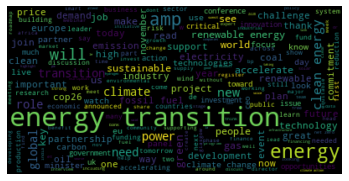

In [159]:
text =''.join(COP['tweetContent']) 

# Create and generate a word cloud image:
wordCloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The wordcloud pictorial diagram above help us to point out the most frequency words that appear in thecdataset.

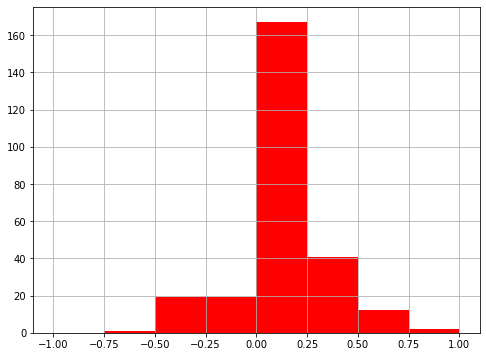

In [160]:
#Histogram graph for polarity
fig,ax = plt.subplots(figsize=(8,6))
COP_Group['polarity'].hist(bins=[-1,-0.75,-0.5,0,0.25,0.5,0.75,1],ax=ax, color = 'red')
plt.show()

In [161]:
# to plot the geographical map for polarity distribution we have;
map = fl.Map(location=[COP_Group.Lat.mean(), COP_Group.Lon.mean()], zoom_start=3, control_scale=True)



for index, location in COP_Group.iterrows():
    fl.Marker([location["Lat"],
                  location["Lon"]],
                 popup = location["polarity"]).add_to(map)
map                 

From the polarity analysis, we can see that the positive comment made on the climate climate change is more than 50% starting from 0.00 to 1 compared to that of the negativie comment. Although some reaction are neutral but the negative comment/reaction toward climate change from the data picked are below 50%.This is fair enough for the united nation and the uk government to look into and resolve before it leads to global emission that could result to global warming.
Looking at the marker in the uk, we can see that some county like London,Nottingham, manchester etc reacted to the climatic change positively while county like Norwich,oxford had negative sentiment to the climate change as seen from the map

# **Task 2.4 Subjectivity analysis**

In [162]:
# Function to generate subjectivity we have;
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [163]:
COP['subjectivity'] = COP['tweetContent'].apply(getTextSubjectivity)

In [164]:
# For we to group the location(i.e. longitude and latitude) and the subjectivity together we have;
COP_Group1=COP.groupby(['Lat','Lon'])['subjectivity'].mean().reset_index()
COP_Group1

,Lat,Lon,subjectivity
0,-41.288795,174.777211,0.750000
1,-37.814218,144.963161,0.033333
2,-37.479830,-72.332675,0.683333
3,-34.928181,138.599931,0.352273
4,-33.928992,18.417396,0.245833
...,...,...,...
237,59.913330,10.738970,0.000000
238,60.333333,-1.333333,0.000000
239,60.394306,5.325919,0.434524
240,61.066692,-107.991707,0.356250


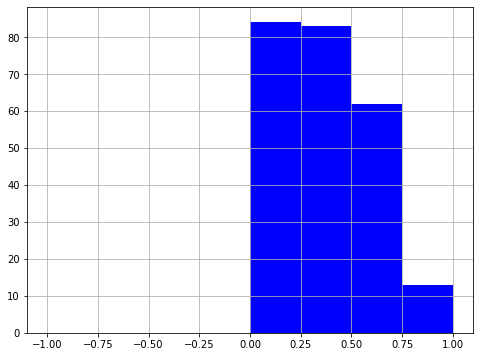

In [165]:
fig,ax = plt.subplots(figsize=(8,6))
COP_Group1['subjectivity'].hist(bins=[-1,-0.75,-0.5,0,0.25,0.5,0.75,1],ax=ax, color = 'blue')
plt.show()

In [166]:
# to plot the geographical map for subjectivity distribution we have;
map = fl.Map(location=[COP_Group1.Lat.mean(), COP_Group1.Lon.mean()], zoom_start=3, control_scale=True)



for index, location_info in COP_Group1.iterrows():
    fl.Marker([location_info["Lat"],
                  location_info["Lon"]],
                 popup = location_info["subjectivity"]).add_to(map)
map

From my analysis, I take county with 0.00 to 0.44 to be objective and 0.45 to 1.00 to be subjective. Looking at the subjectivity from the histogram chart and the map, we can say that 60%-65% tweet comment from the public are objective which sounds as a good news for the uk government and the united nation. Although passing educative infomation about how to prevent global warming/ emission to the public could still be achieved at this early stage.

county like cambridge with 0.75 subjectivity ,washington with 0.71  should be stop from using coal or other subtances that can cause emission or polute the climate.This will be of great help to everyone.

In [ ]:
COP1 = fl.Map(location = [COP.Lat.mean(), COP.Lon.mean()], zoom_start = 5)
COP1

# **Task 2.5 Storify/Interpretation**

Inspection of some random tweet from the 2021 united nation climate change conference data. This tweet discussed about some issue surrounding the climate change which could result to global warming or global average temperature

When looked at the histogram distribution of the polarity tweet, we can see that mostly positive tweet was generated from the analysis which covers more 50% of the tweet analysed. This shows that more than 50% are reacting positively to the climate change.

Although we also have some negative or bad reaction from the public that are not happy with the climate change. Looking at the marker in the uk, we can see that some county like London, Nottingham, manchester etc reacted to the climatic change positively while county like Norwich, oxford had negative sentiment to the climate change as seen from the map.

Most of the public sentiments which shows negative reactions is low. This could be that the goal of holding the increase in the global average temperature to well below 2 degrees above the pre-industrial levels and pursuing efforts to limit the temperature increase to 1.5 degrees above pre-industrial level and recognizes that limiting global warming to 1.5degrees required rapid, deep, and sustained reactions to global greenhouse gas emission

A roughly Gaussian distribution of the polarity parameter is the intriguing property of polarity that can be seen in this case. Which sort of implies there is nothing particularly noteworthy about the polarity of the public sentiment because this is the most typical distribution used to describe the properties of a variable.

The fact that large number of minorities of the public are reacting negatively to the tweet analysis should give the united nation concern and find a way to stop the climate change which could rise and move towards emission in the coming years. This will as well put reduce global house emission from appearing.

From my analysis, I take county with 0.00 to 0.44 to be objective and 0.45 to 1.00 to be subjective. Looking at the subjectivity from the histogram chart and the map, we can say that 60%-65% tweet comment from the public is objective which sounds as good news for the UK government and the united nation. Although passing educative information about how to prevent global warming/ emission to the public could still be achieved at this early stage.

county like Cambridge with 0.75 subjectivity, Washington with 0.71 should be stop from using coal or other substances that can cause emission or pollute the climate. This will be of great help to everyone which means that the united nation can now focus on improving the climate change.

Nonetheless, a considerable number of comments are vague, a further analysis of only the tweet such as using simple word cloud as shown above makes it easy to identify the latent keywords which could further finetune the subjectivity analysis.

# Refernce

'2021 United Nations Climate Change Conference'.wikipedia.Avaliable at: https://en.wikipedia.org/wiki/2021_United_Nations_Climate_Change_Conference (Accessed: 14 december 2022)






